# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree


In [71]:
data = pd.read_csv('datasets/data.csv')
data.shape

(6819, 96)

In [56]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Column names:
* Bankrupt? - 1 = Yes, 0 = No
* ROA(C) before interest and depreciation before interest
* ROA(A) before interest and % after tax
* ROA(B) before interest and depreciation after tax
* Operating Gross Margin
* Realized Sales Gross Margin
* Operating Profit Rate
* Pre-tax net Interest Rate
* After-tax net Interest Rate
* Non-industry income and expenditure/revenue
* Continuous interest rate (after tax)
* Operating Expense Rate
* Research and development expense rate
* Cash flow rate
* Interest-bearing debt interest rate
* Tax rate (A)
* Net Value Per Share (B)
* Net Value Per Share (A)
* Net Value Per Share (C)
* Net Value Per Share (C)
* Persistent EPS in the Last Four Seasons
* Cash Flow Per Share
* Revenue Per Share (Yuan Â¥)
* Operating Profit Per Share (Yuan Â¥)
* Per Share Net profit before tax (Yuan Â¥)
* Realized Sales Gross Profit Growth Rate
* Operating Profit Growth Rate
* After-tax Net Profit Growth Rate
* Regular Net Profit Growth Rate
* Continuous Net Profit Growth Rate
* Total Asset Growth Rate
* Net Value Growth Rate
* Total Asset Return Growth Rate Ratio
* Cash Reinvestment %
* Current Ratio
* Quick Ratio
* Interest Expense Ratio
* Total debt/Total net worth
* Debt ratio %
* Net worth/Assets
* Long-term fund suitability ratio (A)
* Borrowing dependency
* Contingent liabilities/Net worth
* Operating profit/Paid-in capital
* Net profit before tax/Paid-in capital
* Inventory and accounts receivable/Net value
* Total Asset Turnover
* Accounts Receivable Turnover
* Average Collection Days
* Inventory Turnover Rate (times)
* Fixed Assets Turnover Frequency
* Net Worth Turnover Rate (times)
* Revenue per person
* Operating profit per person
* Allocation rate per person
* Working Capital to Total Assets
* Quick Assets/Total Assets
* Current Assets/Total Assets
* Cash/Total Assets
* Quick Assets/Current Liability
* Cash/Current Liability
* Current Liability to Assets
* Operating Funds to Liability
* Inventory/Working Capital
* Inventory/Current Liability
* Current Liabilities/Liability
* Working Capital/Equity
* Current Liabilities/Equity
* Long-term Liability to Current Assets
* Retained Earnings to Total Assets
* Total income/Total expense
* Total expense/Assets
* Current Asset Turnover Rate
* Quick Asset Turnover Rate
* Working capitcal Turnover Rate
* Cash Turnover Rate
* Cash Flow to Sales
* Fixed Assets to Assets
* Current Liability to Liability
* Current Liability to Equity
* Equity to Long-term Liability
* Cash Flow to Total Assets
* Cash Flow to Liability
* CFO to Assets
* Cash Flow to Equity
* Current Liability to Current Assets
* Liability-Assets Flag
* Net Income to Total Assets
* Total assets to GNP price
* No-credit Interval
* Gross Profit to Sales
* Net Income to Stockholder's Equity
* Liability to Equity
* Degree of Financial Leverage (DFL)
* Interest Coverage Ratio (Interest expense to EBIT)
* Net Income Flag
* Equity to Liability


In [53]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [42]:
#Check for missing values, returns True if there are any
print(data.isnull().values.any()) 

False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
# Prepocessing steps

data.drop([' Net Income Flag', ' Net Value Per Share (B)', ' Net Value Per Share (C)' ], axis=1, inplace=True)

#data.drop([' Net Income Flag',' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After tax net Interest Rate', ' Net Value Per Share (B)', ' Net Value Per Share (C)', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)' ], axis=1, inplace=True)

In [73]:
# On closer inspection, some columns have missing values but replaced with zero. 
# We use the mean of the dataset as an estimate of the value

data[[' Tax rate (A)', ' Research and development expense rate', ' Long-term Liability to Current Assets']] = data[[' Tax rate (A)', ' Research and development expense rate', ' Long-term Liability to Current Assets']].apply(lambda x: x.replace(0, x.mean()))

DecisionTreeClassifier: accuracy = 0.959


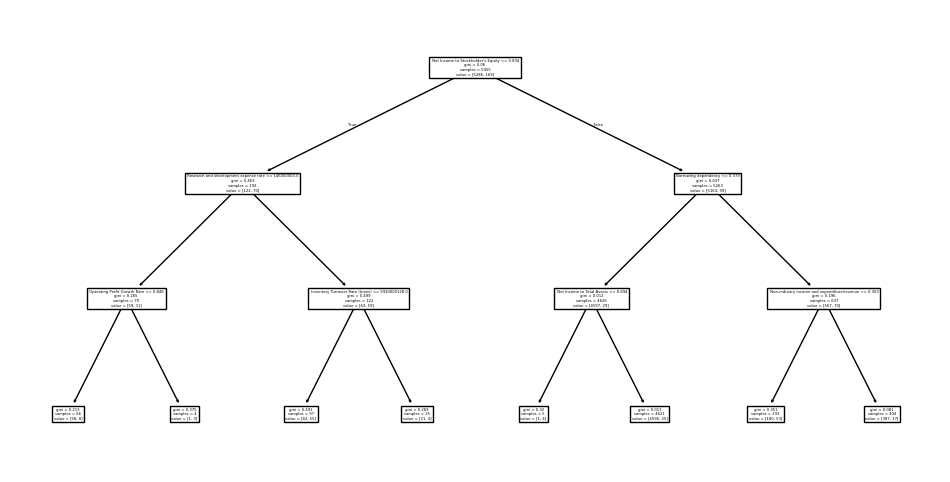

In [74]:
y = data['Bankrupt?']
x = data.drop(columns=['Bankrupt?'])
depth = 3

# Split into training and test sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth,
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

#plotting
feature_names = x.columns.tolist()
plt.figure(figsize=(12,6))
tree.plot_tree(sk_model,
               feature_names=feature_names)
plt.show()
# # Standardize numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Shapes of the resulting datasets
# X_train_scaled.shape, X_test_scaled.shape, y_train.value_counts(), y_test.value_counts()


In [67]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


Depth = 1, train_acc = 0.9654, eval_acc = 0.9726
Depth = 2, train_acc = 0.9682, eval_acc = 0.9736
Depth = 3, train_acc = 0.9700, eval_acc = 0.9746
Depth = 4, train_acc = 0.9736, eval_acc = 0.9677
Depth = 5, train_acc = 0.9786, eval_acc = 0.9658
Depth = 6, train_acc = 0.9832, eval_acc = 0.9629
Depth = 7, train_acc = 0.9870, eval_acc = 0.9609
Depth = 8, train_acc = 0.9908, eval_acc = 0.9570


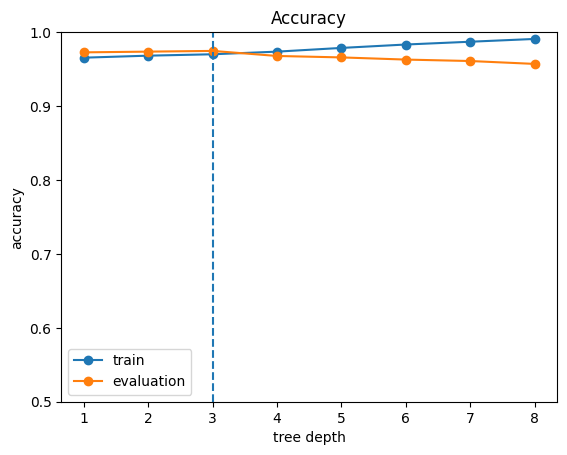

In [75]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 3, test_acc = 0.9717


<Figure size 2000x1000 with 0 Axes>

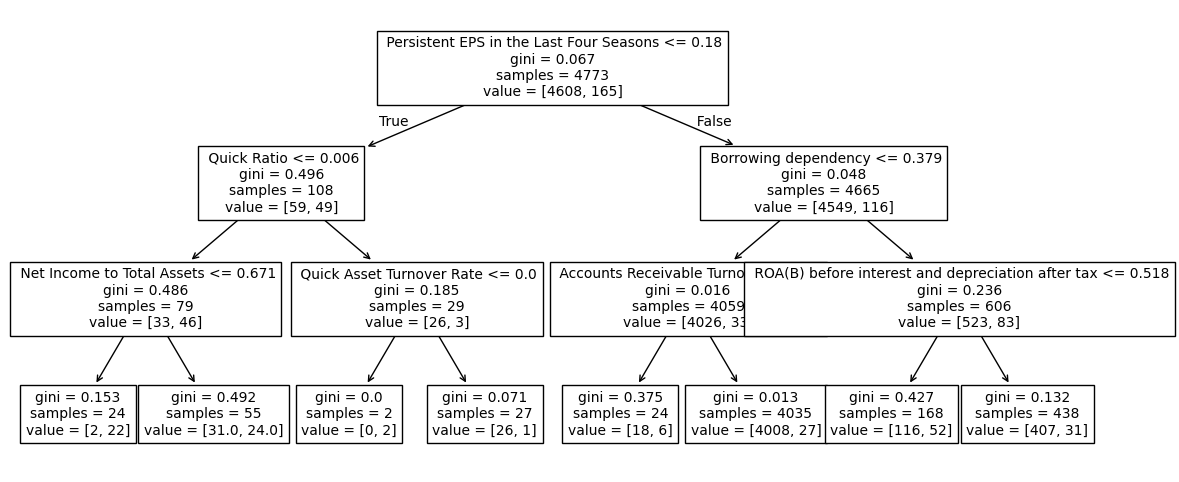

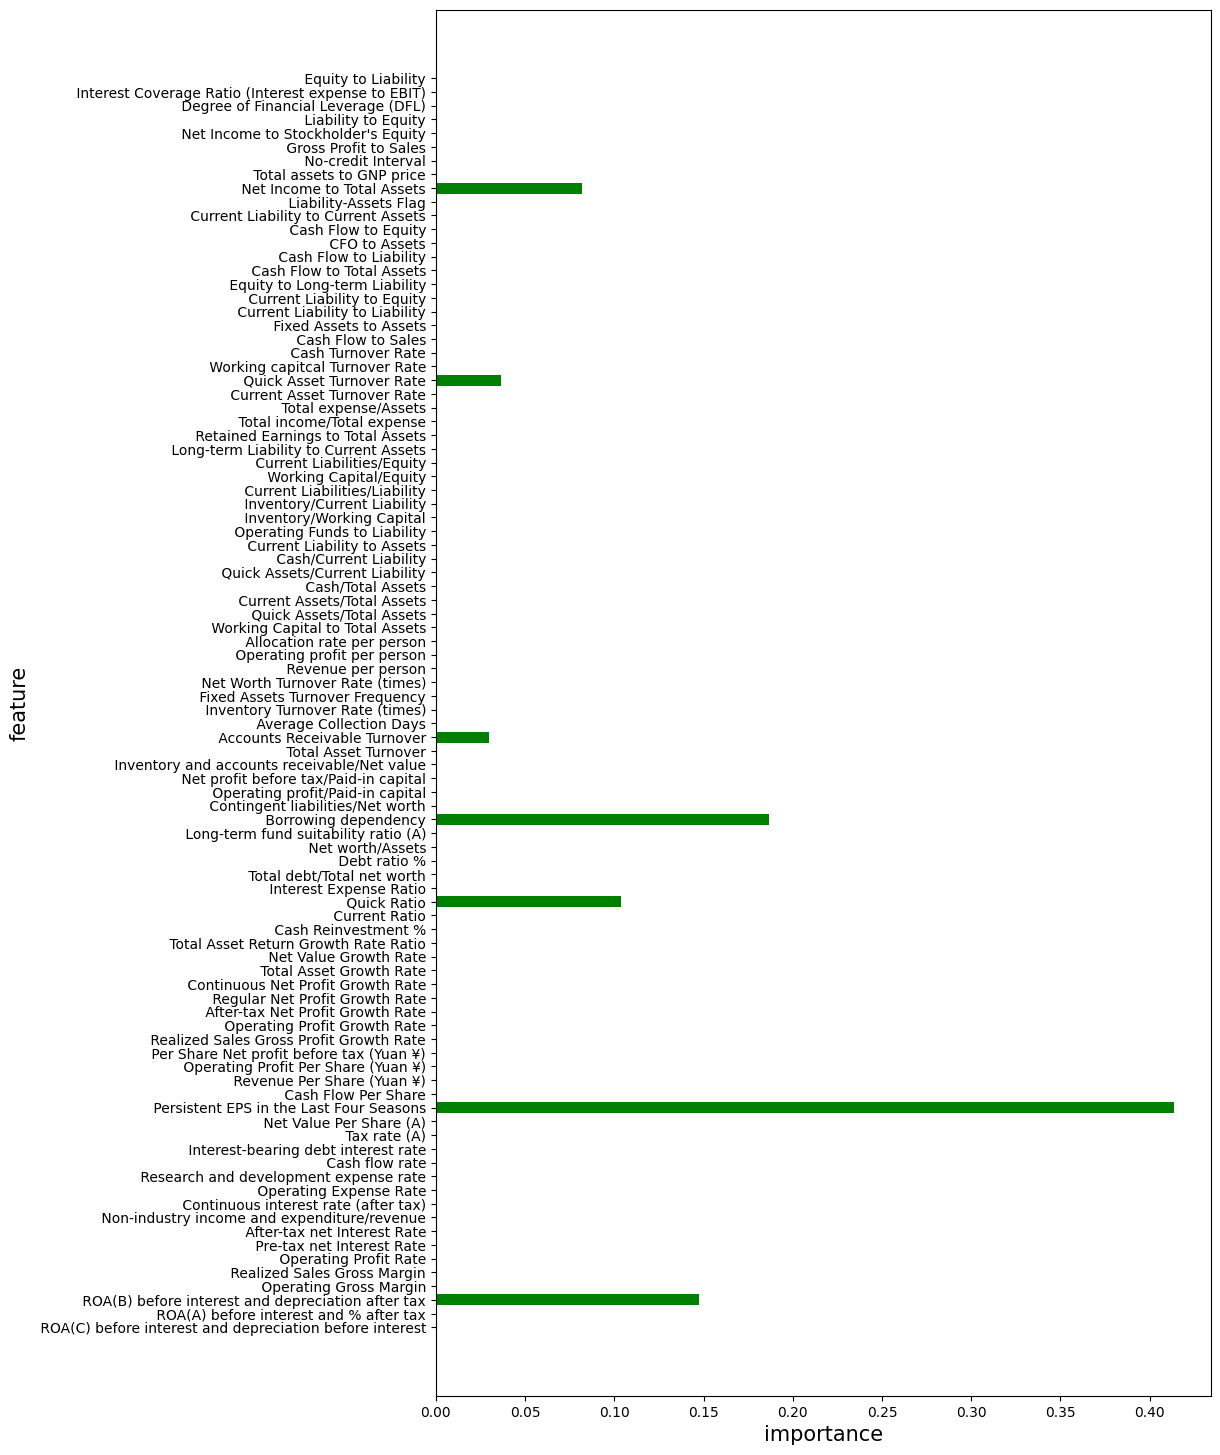

feature importance = [0.    0.    0.147 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.414 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.104 0.    0.    0.    0.
 0.    0.186 0.    0.    0.    0.    0.    0.03  0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.037 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.082
 0.    0.    0.    0.    0.    0.    0.    0.   ]


In [80]:
# I set max_step=1 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.figure(figsize=(10,18))
plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=10)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

In [82]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


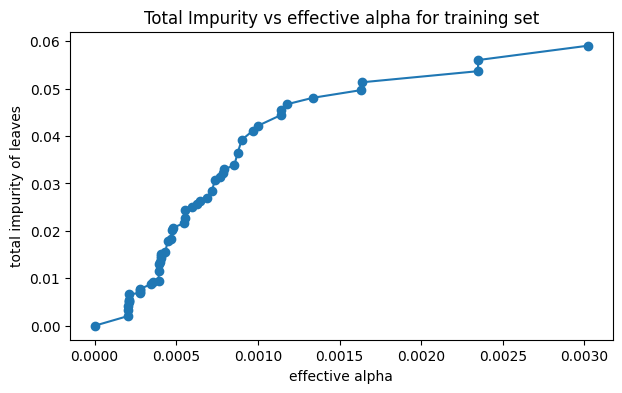

0) alpha = 0.0000 done.
1) alpha = 0.0002 done.
2) alpha = 0.0002 done.
3) alpha = 0.0002 done.
4) alpha = 0.0002 done.
5) alpha = 0.0002 done.
6) alpha = 0.0002 done.
7) alpha = 0.0002 done.
8) alpha = 0.0003 done.
9) alpha = 0.0003 done.
10) alpha = 0.0003 done.
11) alpha = 0.0003 done.
12) alpha = 0.0003 done.
13) alpha = 0.0004 done.
14) alpha = 0.0004 done.
15) alpha = 0.0004 done.
16) alpha = 0.0004 done.
17) alpha = 0.0004 done.
18) alpha = 0.0004 done.
19) alpha = 0.0004 done.
20) alpha = 0.0004 done.
21) alpha = 0.0004 done.
22) alpha = 0.0004 done.
23) alpha = 0.0005 done.
24) alpha = 0.0005 done.
25) alpha = 0.0005 done.
26) alpha = 0.0005 done.
27) alpha = 0.0006 done.
28) alpha = 0.0006 done.
29) alpha = 0.0006 done.
30) alpha = 0.0006 done.
31) alpha = 0.0006 done.
32) alpha = 0.0007 done.
33) alpha = 0.0007 done.
34) alpha = 0.0007 done.
35) alpha = 0.0008 done.
36) alpha = 0.0008 done.
37) alpha = 0.0008 done.
38) alpha = 0.0009 done.
39) alpha = 0.0009 done.
40) alpha 

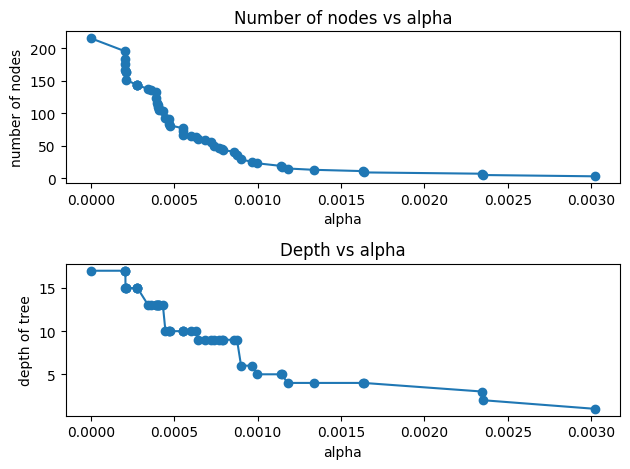

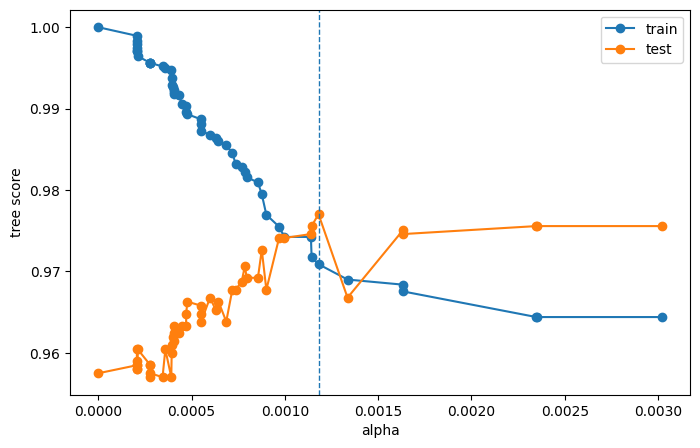

Accuracy of test data = 0.9770
Optimal alpha = 0.00118025


In [83]:
#Pruning
# Separate the Titanic data into features and target class.
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Apply Cost Complexity Pruning (CCP) and get the alpha-star list.
model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas[:-1]  # exclude the last one.
impurity = path.impurities[:-1]

# Observe impurity changes for alpha changes.
# As alpha increases, the penalty for |T| increases, resulting in
# simple trees and increased impurity (misclassification error).
plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker='o')
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# C(T) = R(T) + α|T|
# Create trees for each alpha in the alpha-list.
models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d) alpha = %.4f done.' % (i, alpha))

# You can see that as alpha increases, 
# the number and depth of nodes decrease.
node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Among the candidate trees, find the one with the lowest 
# misclassification rate on the test data. It's the same to find 
# the tree with the highest score.
# Calculate the score of the tree (model) with alpha applied.
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Find the alpha that creates the tree with the highest score on 
# the test data. This is the optimal alpha, and the tree is optimal.
i_max = np.argmax(test_score)
opt_alpha = ccp_alpha[i_max]
opt_model = models[i_max]

# Observe the change in score for the change in alpha.
plt.figure(figsize=(8,5))
plt.plot(ccp_alpha, train_score, marker='o', label='train')
plt.plot(ccp_alpha, test_score, marker='o', label='test')
plt.axvline(x=opt_alpha, ls='--', lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show()

# Evaluate the performance of the final tree.
print('Accuracy of test data = %.4f' % opt_model.score(x_test, y_test))
print('Optimal alpha = %.8f' % opt_alpha)


Multiclass Classification

In [84]:
# Load in our dataset
iris = load_iris(as_frame=True)
x = iris.data 
y = iris.target

# Generate training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

Accuracy of Model = 0.947


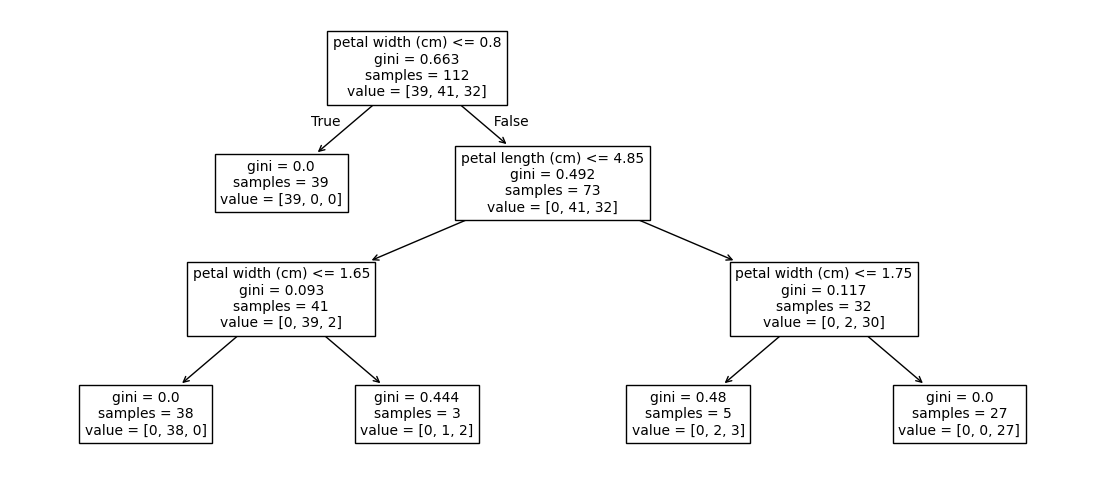

In [85]:
# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Estimate the class of validation date.
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

In [86]:
# Plot the training data and draw the estimated curve.
def plot_prediction(x, y, x_test, y_pred, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, c='blue', s=20, alpha=0.5, label='train data')
    plt.plot(x_test, y_pred, c='red', lw=2.0, label='prediction')
    plt.xlim(0, 1)
    plt.ylim(0, 7)
    plt.legend()
    plt.title(title)
    plt.show()

# Generate nonlinear data for regression testing.
def noisy_sine_data(n, s):
   rtn_x, rtn_y = [], []
   for i in range(n):
       x= np.random.random()
       y= 2.0*np.sin(2.0*np.pi*x)+np.random.normal(0.0, s) + 3.0
       rtn_x.append(x)
       rtn_y.append(y)
   return np.array(rtn_x).reshape(-1,1), np.array(rtn_y)

# Create training and test data
x_train, y_train = noisy_sine_data(n=500, s=0.5)
x_test = np.linspace(0, 1, 50).reshape(-1, 1)  


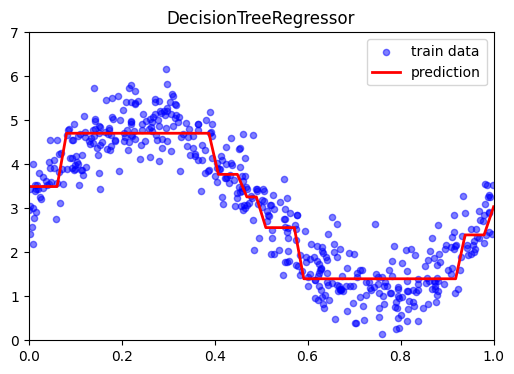

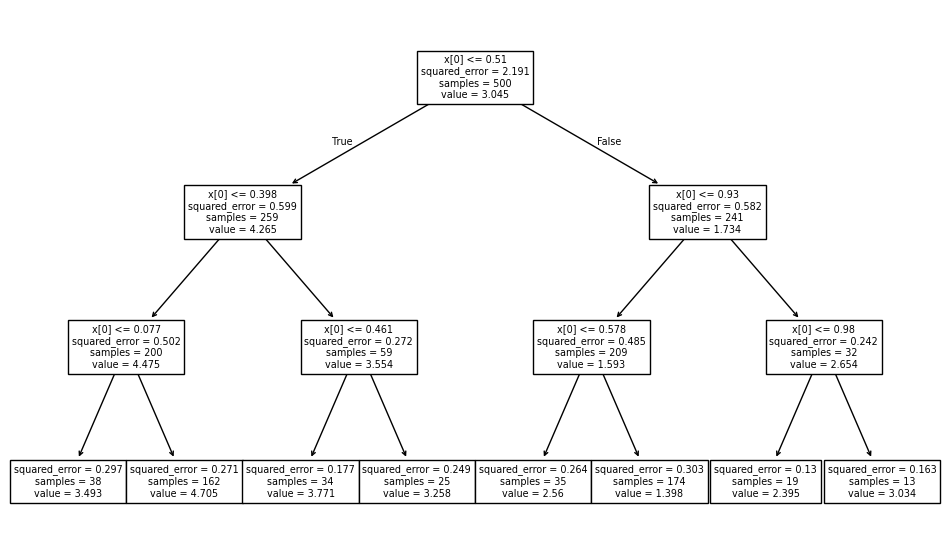

In [87]:
depth = 3

sk_model = DecisionTreeRegressor(max_depth = depth)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)

# Plot the training data and draw the estimated curve.
plot_prediction(x_train, y_train, x_test, sk_pred, 'DecisionTreeRegressor')

plt.figure(figsize=(12,7))
tree.plot_tree(sk_model)
plt.show()